# Exploring the different variables that affect the loan status
## by Mohamed Elwakel

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df['DateCreditPulled'] = pd.to_datetime(df['DateCreditPulled'])
df['FirstRecordedCreditLine'] = pd.to_datetime(df['FirstRecordedCreditLine'])
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
msng_vals_index = missing_value_df[percent_missing > 30].index

In [8]:
df.drop(msng_vals_index , axis = 1 , inplace = True)

In [9]:
df.fillna(value = df.mean(), inplace= True)

<ipython-input-9-c3b64b691609>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(value = df.mean(), inplace= True)


In [10]:
df.isna().sum()

ListingKey                     0
ListingNumber                  0
ListingCreationDate            0
Term                           0
LoanStatus                     0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 69, dtype: int64

In [11]:
df.dropna(axis =1, inplace = True)

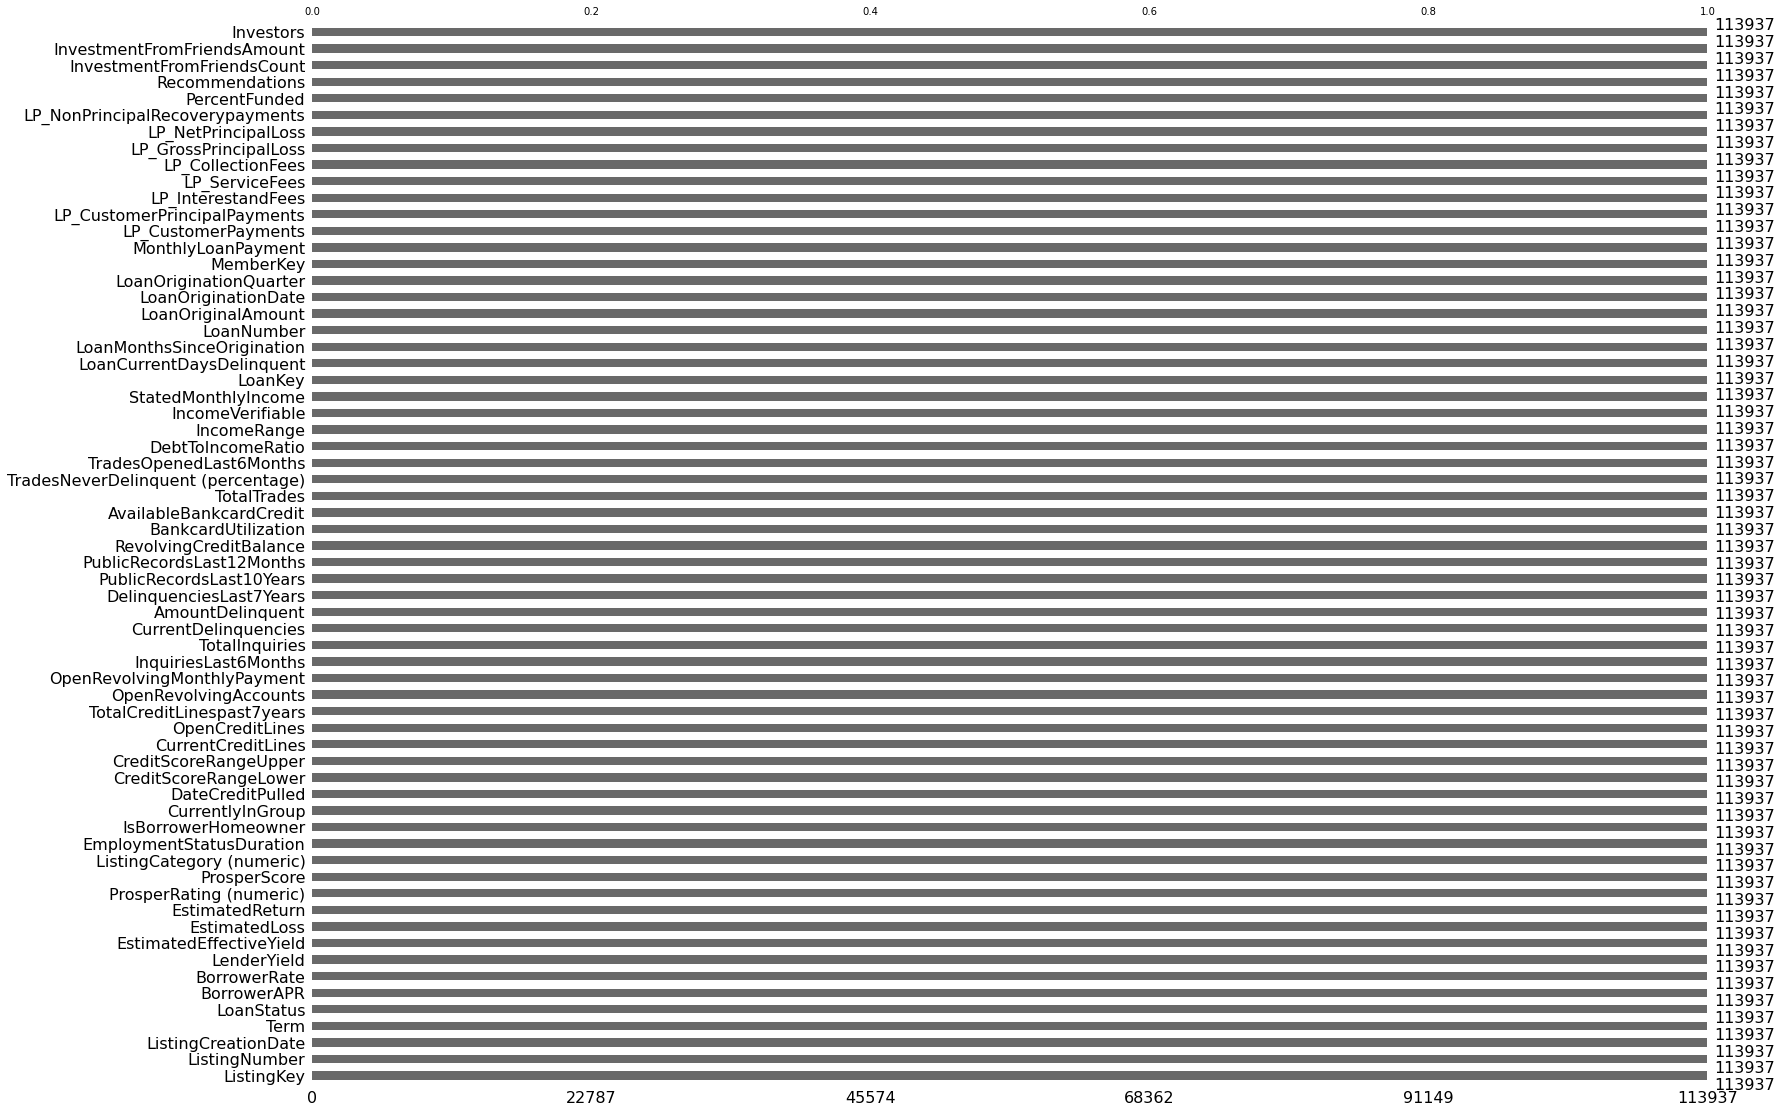

In [12]:
msno.bar(df);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 64 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   ListingKey                          113937 non-null  object        
 1   ListingNumber                       113937 non-null  int64         
 2   ListingCreationDate                 113937 non-null  datetime64[ns]
 3   Term                                113937 non-null  int64         
 4   LoanStatus                          113937 non-null  object        
 5   BorrowerAPR                         113937 non-null  float64       
 6   BorrowerRate                        113937 non-null  float64       
 7   LenderYield                         113937 non-null  float64       
 8   EstimatedEffectiveYield             113937 non-null  float64       
 9   EstimatedLoss                       113937 non-null  float64       
 10  Estimate

In [14]:
df.shape

(113937, 64)

### What is the structure of your dataset?

> 113937 Rows, 64 columns

### What is/are the main feature(s) of interest in your dataset?

> The huge variety of factors that may affect it's results

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following features will help support the investigation : Is Borrower Homeowner, term, loan status, Income Range ,borrower rate and Monthly Loan Payment

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [15]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
Term                                3
LoanStatus                         12
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 64, dtype: int64

**Loan Status**

In [16]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

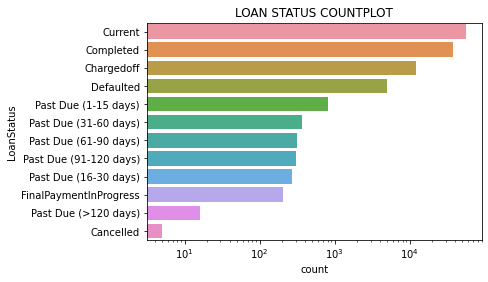

In [17]:
sb.countplot(data = df, y = 'LoanStatus', order = df['LoanStatus'].value_counts().index)
plt.xscale('log')
plt.title('LOAN STATUS COUNTPLOT');

**We find that most counts concentrated between the first three categories which also make sense here and there is nothing suspecious to run after**

**Term**

In [18]:
df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

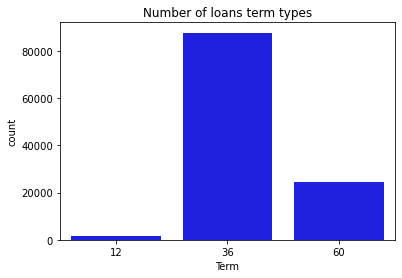

In [19]:
sb.countplot(data = df, x = 'Term', color = 'blue')
plt.title('Number of loans term types');

**It turns out the majority of people apply to the 36-months-loan**

**Borrower Rate & Borrower APR**

In [20]:
df.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

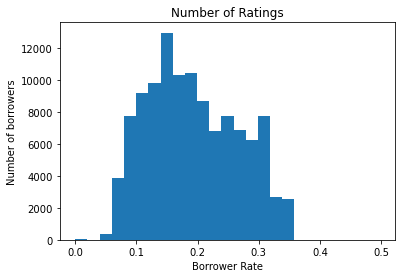

In [21]:
plt.hist(data = df , x = 'BorrowerRate' , bins = 25)
plt.xlabel('Borrower Rate')
plt.ylabel('Number of borrowers')
plt.title('Number of Ratings');

In [22]:
df.BorrowerAPR.describe()

count    113937.000000
mean          0.218828
std           0.080355
min           0.006530
25%           0.156290
50%           0.209790
75%           0.283700
max           0.512290
Name: BorrowerAPR, dtype: float64

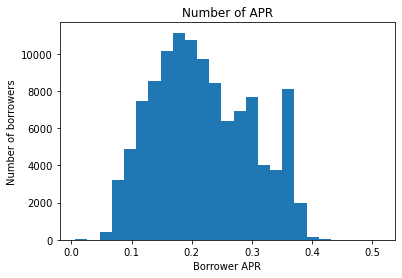

In [23]:
plt.hist(data = df , x = 'BorrowerAPR' , bins = 25)
plt.xlabel('Borrower APR')
plt.ylabel('Number of borrowers')
plt.title('Number of APR');

**Lender Yield**

In [24]:
df.LenderYield.describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

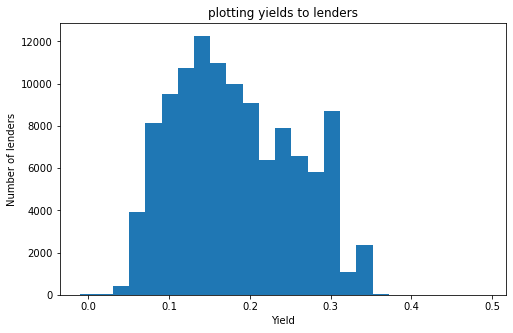

In [25]:
plt.figure(figsize=[8, 5])
plt.hist(data = df , x = 'LenderYield' , bins = 25)
plt.xlabel('Yield')
plt.ylabel('Number of lenders')
plt.title('plotting yields to lenders');

**Now we find that most of the previous three plots concentrated around 0.20**

**Estimated Loss**

In [26]:
df.EstimatedLoss.describe()

count    113937.000000
mean          0.080306
std           0.040356
min           0.004900
25%           0.054900
50%           0.080306
75%           0.097500
max           0.366000
Name: EstimatedLoss, dtype: float64

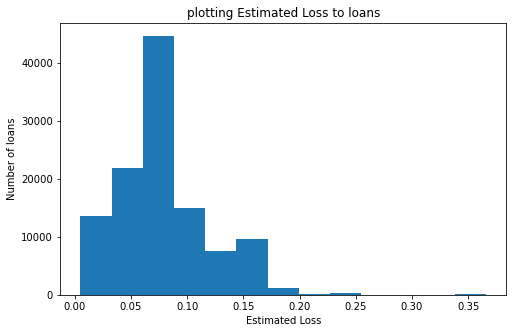

In [27]:
plt.figure(figsize=[8, 5])
plt.hist(data = df , x = 'EstimatedLoss' , bins = 13)
plt.xlabel('Estimated Loss')
plt.ylabel('Number of loans')
plt.title('plotting Estimated Loss to loans');

**Something interesting huge amount of loans have the Estimated loss around 0.08**

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The plot that has been investigated looks very normal .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I didn't have to change the data types or change it's form so as not to spoil it . 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [28]:
numeric_vars = ['BorrowerRate','LenderYield','ListingCategory (numeric)',
               'PercentFunded','Recommendations','InvestmentFromFriendsAmount',
               'Investors','IncomeVerifiable','StatedMonthlyIncome','LoanMonthsSinceOrigination',
               'LoanNumber','LoanOriginalAmount','MonthlyLoanPayment']
category_vars = ['LoanStatus','IsBorrowerHomeowner','IncomeRange','CurrentlyInGroup','Term']
LP_columns = ['LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees',
              'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss',
              'LP_NonPrincipalRecoverypayments']

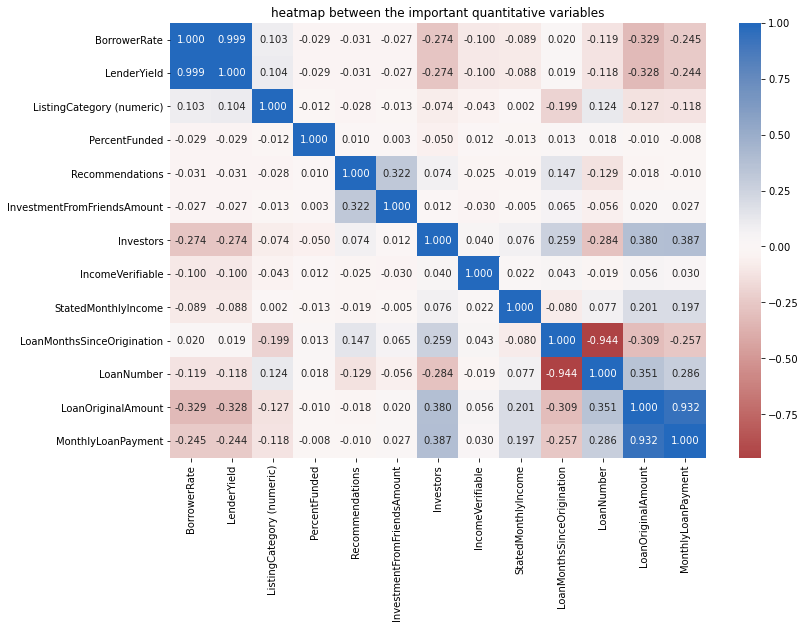

In [29]:
plt.figure(figsize = [12, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('heatmap between the important quantitative variables')
plt.show()

**Some of relations are axiomatic as we see like the nagative relation between loan months and loan number or the positive one between loan amount and monthly payment but when we look to the other significant one now we see relations like the loan amount and the yield or borrower rate and monthly payment which make sense here**

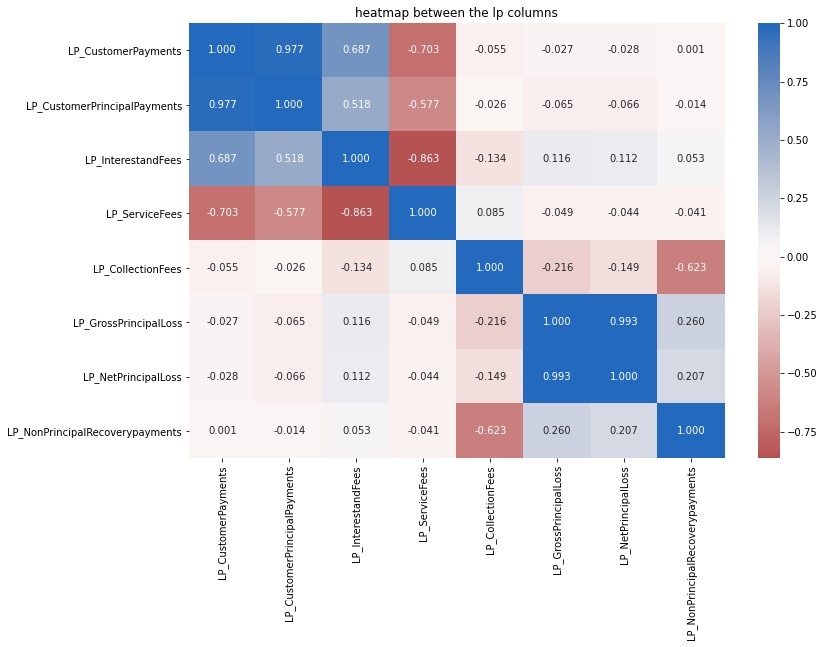

In [30]:
plt.figure(figsize = [12, 8])
sb.heatmap(df[LP_columns].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('heatmap between the lp columns')
plt.show()

**some relations here should be 1.0 or -1.0 but it's not, so it tells us how much lost during the process**

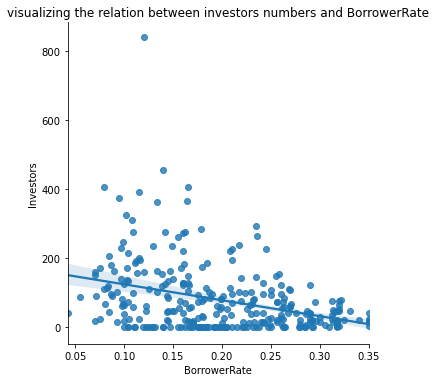

In [31]:
ds = df.sample(n=300)
sb.lmplot(data= ds, x ='BorrowerRate', y ='Investors')
plt.title('visualizing the relation between investors numbers and BorrowerRate');

**The less the borrower rate is the less number of investors take part in the loan**

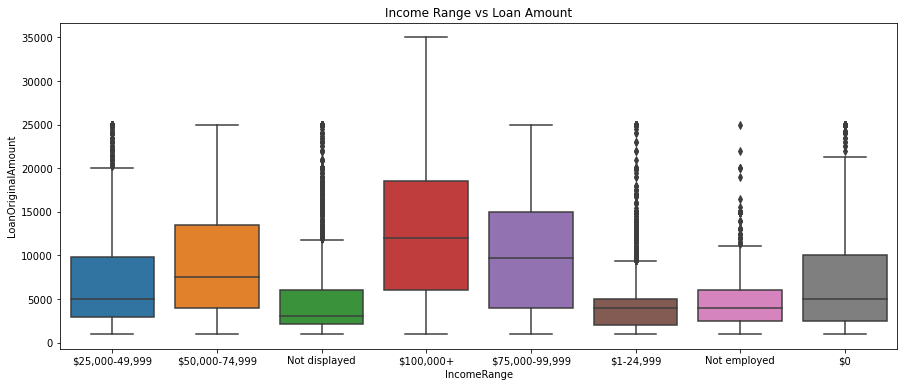

In [32]:
plt.figure(figsize = [15, 6])
sb.boxplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount')
plt.title('Income Range vs Loan Amount');

**People with large income apply for the larger loans because the policy of bank and payment ability as well**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It turns out that the lower the Borrowers Rate is the fewer investors finance them and the strong relathionship between loan amount and income range

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes , there is interesting relationships between the other features positive and negative too like the negative correlation between borrower rate and loan amount or the positive one between borrower rate and lender yield by example and that's the power of the heatmap and that's why we make it too.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [33]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,0.168661,0.080306,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.079600,0.024900,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,0.168661,0.080306,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.084900,0.024900,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.183160,0.092500,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [34]:
df.nunique()

ListingKey                     113066
ListingNumber                  113066
ListingCreationDate            113064
Term                                3
LoanStatus                         12
                                ...  
PercentFunded                     719
Recommendations                    17
InvestmentFromFriendsCount         14
InvestmentFromFriendsAmount       726
Investors                         751
Length: 64, dtype: int64

In [35]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.16516,0.1580,0.1380,0.168661,0.080306,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.079600,0.024900,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.28269,0.2750,0.2400,0.168661,0.080306,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.084900,0.024900,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.183160,0.092500,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [36]:
np.random.seed(2018)
sample = np.random.choice(df.shape[0], 300, replace = False )
df_subset = df.loc[sample]

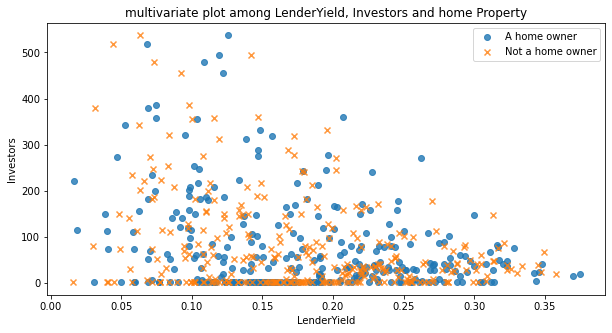

In [37]:
plt.figure(figsize=[10, 5])
ttype_marker = [['True' , 'o'],
               ['False' , 'x']]
for ttype , marker in ttype_marker:
    plot_data = df_subset.loc[df_subset['IsBorrowerHomeowner'] == ttype ]
    sb.regplot(data= df_subset, x= 'LenderYield', y= 'Investors'
              ,x_jitter= 0.04 , fit_reg = False , marker = marker)
plt.title('multivariate plot among LenderYield, Investors and home Property')
plt.legend(['A home owner' , 'Not a home owner']);

**Here is a quiet equally distributed distribution for home ownership through the different values and negative relation between the yield and the number of investors**

In [38]:
np.random.seed(2018)
sample2 = np.random.choice(df.shape[0], 100, replace = False )
df_subset2 = df.loc[sample2]

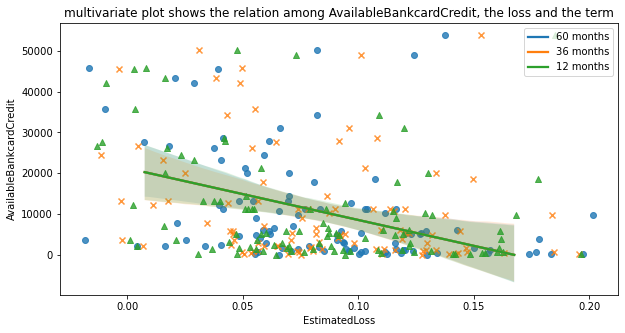

In [39]:
plt.figure(figsize=[10, 5])
ttype_marker = [['60' , 'o'],
               ['36' , 'x'],
               ['12', '^']]
for ttype , marker in ttype_marker:
    plot_data = df_subset2.loc[df_subset2['Term'] == ttype ]
    sb.regplot(data= df_subset2, x= 'EstimatedLoss', y= 'AvailableBankcardCredit'
              ,x_jitter= 0.04, marker = marker)
plt.title('multivariate plot shows the relation among AvailableBankcardCredit, the loss and the term')
plt.legend(['60 months' , '36 months' , '12 months']);

**The 36-months-loan has lion part through all loan types but the 12-months-loan here has a good existance here too and there's  a negative relation between the Available BankcardCredit and the loss**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>ِِIt seems that the more lender yield returns the less the number of investors contribution  

### Were there any interesting or surprising interactions between features?

> Contrary to expected based on the data we have there is no relation between having a home in your own property or not having it and the number of investors or the lender yield

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [40]:
!jupyter nbconvert project_3.ipynb --to slides --no-input

[NbConvertApp] Converting notebook project_3.ipynb to slides
[NbConvertApp] Writing 592274 bytes to project_3.slides.html
